In [1]:
list = [0] * 2
print(len(list))


2


**-- Giới thiệu --**

Tìm diện tích của một đa giác vẫn là một bí ẩn cho tới ít nhất  2.500  năm trước, khi người Hy Lạp cổ đại chia đa giác thành các tam giác và cộng diện tích của chúng lại. Để tìm diện tích của các hình cong, như hình tròn, người Hy Lạp cổ đại đặt các đa giác nội tiếp bên trong các hình cong đó. Như trong Fig. 2.4.1, một đa giác nội tiếp với càng nhiều cạnh bằng nhau thì càng xấp xỉ đúng hình tròn. Quy trình này còn được biết đến như phương pháp vét kiệt.

***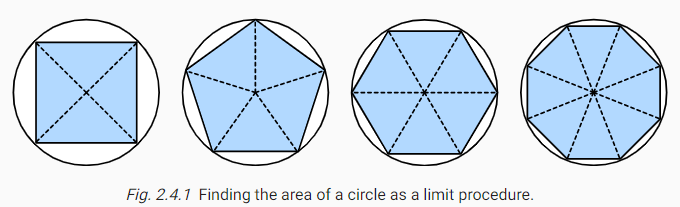***

Phương pháp vét kiệt chính là khởi nguồn của giải tích tích phân (sẽ được miêu tả trong Section 18.5). Hơn  2.000  năm sau, nhánh còn lại của giải tích, giải tích vi phân, ra đời. Trong những ứng dụng quan trọng nhất của giải tích vi phân, các bài toán tối ưu hoá sẽ tìm cách tốt nhất để thực hiện một công việc nào đó. Như đã bàn đến trong Section 2.3.10.1, các bài toán như vậy vô cùng phổ biến trong học sâu.

Trong học sâu, chúng ta huấn luyện các mô hình, cập nhật chúng liên tục để chúng ngày càng tốt hơn khi học với nhiều dữ liệu hơn. Thông thường, trở nên tốt hơn tương đương với cực tiểu hoá một hàm mất mát, một điểm số sẽ trả lời câu hỏi “mô hình của ta đang tệ tới mức nào?” Câu hỏi này lắt léo hơn ta tưởng nhiều. Mục đích cuối cùng mà ta muốn là mô hình sẽ hoạt động tốt trên dữ liệu mà nó chưa từng nhìn thấy. Nhưng chúng ta chỉ có thể khớp mô hình trên dữ liệu mà ta đang có thể thấy. Do đó ta có thể chia việc huấn luyện mô hình thành hai vấn đề chính: i) tối ưu hoá: quy trình huấn luyện mô hình trên dữ liệu đã thấy. ii) tổng quát hoá: dựa trên các nguyên tắc toán học và sự uyên thâm của người huấn luyện để tạo ra các mô hình mà tính hiệu quả của nó vượt ra khỏi tập dữ liệu huấn luyện.

In [ ]:
!pip install d2l==1.0.0-beta0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 40.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 KB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.6/155.6 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.4 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616822 sha256=83f81fa6cc1df1ae78565d4f1a361d244b377bd4ed4bdb4033bf1847d04d1828
  Stored in directory: /root/.cache/pip/wheels/27/6d/b3/a3a6e10704795c9b9000f1ab2dc480dfe7bed42f5972806e73
Successfully built gym
  Attempting uninstal

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


# 2.4.1 Đạo hàm và Vi phân

Chúng ta bắt đầu bằng việc đề cập tới khái niệm đạo hàm, một bước quan trọng của hầu hết các thuật toán tối ưu trong học sâu. Trong học sâu, ta thường chọn những hàm mất mát khả vi theo các tham số của mô hình. Nói đơn giản, với mỗi tham số, ta có thể xác định hàm mất mát tăng hoặc giảm nhanh như thế nào khi tham số đó tăng hoặc giảm chỉ một lượng cực nhỏ.

Giả sử ta có một hàm  $f:R→R$  có đầu vào và đầu ra đều là số vô hướng. *Đạo hàm của  f  được định nghĩa là*

**$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}.$$**

Để minh họa cho khái niệm đạo hàm, hãy thử với một ví dụ. Định nghĩa  $u=f(x)=3x2−4x$.

In [ ]:
def f(x):
    return 3 * x ** 2 - 4 * x

Cho  $x=1$  và  *$h$*  tiến về  **0** , kết quả của phương trình $\frac{f(x+h) - f(x)}{h}$ tiến về  2 . Dù thử nghiệm này không phải là một dạng chứng minh toán học, lát nữa ta sẽ thấy rằng quả thật $f'(1) = 2$. .

In [ ]:
def numerical_lim(f,x,h):
  return (f(x+h) - f(x)) / h

h = 0.1
for i in range(5):
  print('h=%.5f, numerical limit=%.5f' %(h, numerical_lim(f, 1,h)))
  h*=0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


Hãy làm quen với một vài ký hiệu cùng được dùng để biểu diễn đạo hàm. Cho  $y=f(x)$  với  $x$  và  $y$  lần lượt là biến độc lập và biến phụ thuộc của hàm  $f$ . Những biểu diễn sau đây là tương đương nhau:

$$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x),$$

với ký hiệu  $\frac{d}{dx}$  và  $D$  là các toán tử vi phân (*differentiation operator*) để chỉ các phép toán *vi phân*. Ta có thể sử dụng các quy tắc lấy đạo hàm của các hàm thông dụng sau đây:

$$\begin{aligned} \frac{d}{dx} C & = 0 && \text{for any constant $C$} \\ \frac{d}{dx} x^n & = n x^{n-1} && \text{for } n \neq 0 \\ \frac{d}{dx} e^x & = e^x \\ \frac{d}{dx} \ln x & = x^{-1} \end{aligned}$$

Để lấy đạo hàm của một hàm được tạo từ vài hàm đơn giản hơn, ví dụ như từ những hàm thông dụng ở trên, có thể dùng các quy tắc hữu dụng dưới đây. Giả sử hàm  $f$  và $g$ đều khả vi và  $C$  là một hằng số, ta có quy tắc nhân hằng số

$$\begin{aligned} \frac{d}{dx} [C f(x)] & = C \frac{d}{dx} f(x)\end{aligned}$$

Quy tắc tổng

$$\begin{aligned} \ \frac{d}{dx} [f(x) + g(x)] & = \frac{d}{dx} f(x) + \frac{d}{dx} g(x) && \end{aligned}$$

Quy tắc nhân

$$\begin{aligned}\ \frac{d}{dx} [f(x) g(x)] & = f(x) \frac{d}{dx} g(x) + g(x) \frac{d}{dx} f(x)\end{aligned}$$

và Quy tắc đạo hàm phân thức

$$\begin{aligned}\ \frac{d}{dx} \frac{f(x)}{g(x)} & = \frac{g(x) \frac{d}{dx} f(x) - f(x) \frac{d}{dx} g(x)}{g^2(x)}\end{aligned}$$

Bây giờ ta có thể áp dụng các quy tắc ở trên để tìm đạo hàm $$\frac{d}{dx} [3 x^2 - 4x] = 3 \frac{d}{dx} x^2 - 4 \frac{d}{dx} x = 6x - 4.$$. Vậy nên, với  $x=1$ , ta có  $u′=2$ : điều này đã được kiểm chứng với thử nghiệm lúc trước ở mục này khi kết quả có được cũng tiến tới  2 . Giá trị đạo hàm này cũng đồng thời là độ dốc của đường tiếp tuyến với đường cong  $u=f(x)$  tại  $x=1$.

Để minh họa cách hiểu này của đạo hàm, ta sẽ dùng matplotlib, một thư viện vẽ biểu đồ thông dụng trong Python. Ta cần định nghĩa một số hàm để cấu hình thuộc tính của các biểu đồ được tạo ra bởi matplotlib. Trong đoạn mã sau, hàm `use_svg_display` chỉ định matplotlib tạo các biểu đồ ở dạng svg để có được chất lượng ảnh sắc nét hơn.

In [ ]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

Ta định nghĩa hàm `set_figsize` để chỉ định kích thước của biểu đồ. Lưu ý rằng ở đây ta đang dùng trực tiếp d2l.plt do câu lệnh from matplotlib import pyplot as plt đã được đánh dấu để lưu vào gói d2l trong phần đầu.

In [ ]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

Hàm `set_axes` sau cấu hình thuộc tính của các trục biểu đồ tạo bởi matplotlib.

In [ ]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

Với ba hàm cấu hình biểu đồ trên, ta định nghĩa hàm plot để vẽ nhiều đồ thị một cách nhanh chóng vì ta sẽ cần minh họa khá nhiều đồ thị xuyên suốt.

In [ ]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

Giờ ta có thể vẽ đồ thị của hàm số  $u=f(x)$  và đường tiếp tuyến của nó  $y=2x−3$  tại  $x=1$ , với hệ số 2 là độ dốc của tiếp tuyến.

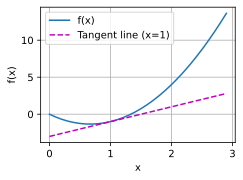

In [ ]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

# 2.4.2. Đạo hàm riêng

Cho tới giờ, ta đã làm việc với đạo hàm của các hàm một biến. Trong học sâu, các hàm lại thường phụ thuộc vào nhiều biến. Do đó, ta cần mở rộng ý tưởng của đạo hàm cho các hàm nhiều biến đó.

Cho  $y=f(x1,x2,…,xn)$  là một hàm với  $n$  biến. Đạo hàm riêng của  $y$ theo tham số thứ  $i$ , $x_i$ , là

$$ \frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.$$

Để tính  $\frac{\partial y}{\partial x_i}$ , ta chỉ cần coi  $x_1,…,x_{i−1},x_{i+1},…,xn$ là các hằng số và tính đạo hàm của  $y$ theo $x_i$. Để biểu diễn đạo hàm riêng, các ký hiệu sau đây đều có ý nghĩa tương đương:

$$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = \partial_{x_i} f = \partial_i f = f_{x_i} = f_i = D_i f = D_{x_i} f.$$

# 2.4.3. Gradient

Chúng ta có thể ghép các đạo hàm riêng của mọi biến trong một hàm nhiều biến để thu được vector *gradient* của hàm số đó. Giả sử rằng đầu vào của hàm  $f:Rn→R$  là một vector  n  chiều  $x=[x_1,x_2,…,x_n]^⊤$  và đầu ra là một số vô hướng. Gradient của hàm $f(x)$ theo $x$ là một vector gồm $n$ đạo hàm riêng đó:

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \left[\partial_{x_1} f(\mathbf{x}), \partial_{x_2} f(\mathbf{x}), \ldots
\partial_{x_n} f(\mathbf{x})\right]^\top.$$ 

Cho $x$ là một vector $n$-chiều, các quy tắc sau thường được dùng khi tính vi phân hàm đa biến:


*   Với mọi $A∈Rm×n$, $∇_xAx=A^⊤$,
*   Với mọi $A∈Rn×m$, $∇_xx^⊤A=A$,
*   Với mọi $A∈Rn×n$, $∇_xx^⊤Ax=(A+A^⊤)x$,
*   $∇_x∥x∥^2=∇_xx^⊤x=2x$.

Tương tự, với bất kỳ ma trận $X$  nào, ta đều có $∇_X∥X∥^2_F=2X$. Sau này ta sẽ thấy, gradient sẽ rất hữu ích khi thiết kế thuật toán tối ưu trong học sâu.



#2.4.4 Quy tắc dây chuyền

Tuy nhiên, những gradient như thế có thể khó để tính toán. Đó là bởi vì các hàm nhiều biến trong học sâu đa phần là những hàm hợp, nên ta không thể áp dụng các quy tắc đề cập ở trên để lấy vi phân cho những hàm này. May mắn thay, quy tắc dây chuyền cho phép chúng ta lấy vi phân của các hàm hợp.

Trước tiên, chúng ta hãy xem xét các hàm một biến. Giả sử hai hàm $y=f(u)$ và $u=g(x)$ đều khả vi, quy tắc dây chuyền được mô tả như sau

$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$

Giờ ta sẽ xét trường hợp tổng quát hơn đối với các hàm nhiều biến. Giả sử một hàm khả vi $y$ có các biến số $u_1,u_2,…,u_m$, trong đó mỗi biến $u_i$ là một hàm khả vi của các biến $x_1,x_2,…,x_n$. Lưu ý rằng $y$ cũng là hàm của các biến $x_1,x_2,…,x_n$. Quy tắc dây chuyền cho ta:

$$\frac{\partial y}{\partial x_{i}} = \frac{\partial y}{\partial u_{1}} \frac{\partial u_{1}}{\partial x_{i}} + \frac{\partial y}{\partial u_{2}} \frac{\partial u_{2}}{\partial x_{i}} + \ldots + \frac{\partial y}{\partial u_{m}} \frac{\partial u_{m}}{\partial x_{i}} \text{ and thus } \nabla_{\mathbf{x}} y =  \mathbf{A} \nabla_{\mathbf{u}} y,$$

cho mỗi $i=1,2,…,n$.

#2.4.5. Tổng kết


*   Vi phân và tích phân là hai nhánh con của giải tích, trong đó vi phân được ứng dụng rộng rãi trong các bài toán tối ưu hóa của học sâu.
*   Đạo hàm có thể được hiểu như là tốc độ thay đổi tức thì của một hàm số đối với các biến số. Nó cũng là độ dốc của đường tiếp tuyến với đường cong của hàm.
*   Gradient là một vector có các phần tử là đạo hàm riêng của một hàm nhiều biến theo tất cả các biến số của nó.
*   Quy tắc dây chuyền cho phép chúng ta lấy vi phân của các hàm hợp.

# 2.4.6 Bài tập

Vẽ đồ thị của hàm số  y=f(x)=x3−1x  và đường tiếp tuyến của nó tại  x=1 . 1. Tìm gradient của hàm số  f(x)=3x21+5ex2 . 1. Gradient của hàm  f(x)=∥x∥2  là gì? 1. Có thể dùng quy tắc dây chuyền cho trường hợp sau đây không:  u=f(x,y,z) , với  x=x(a,b) ,  y=y(a,b)  và  z=z(a,b) ?